## 数据导入，观察，准备预处理

In [1]:
import matplotlib.pyplot as plt
plt.rcParams["font.sans-serif"]=["SimHei"]
plt.rcParams["font.family"]="sans-serif"
plt.rcParams['axes.unicode_minus'] =False
import pandas as pd
from datetime import datetime

RAW_DATA = 'C:/Users/79918/Desktop/光伏数据.xlsx'

raw_data = pd.read_excel(r'C:/Users/79918/Desktop/光伏数据.xlsx')

print(raw_data.head())

   device_id  energy_consumption  calc_date  calc_time create_or_update_time
0        432                 0.0 2021-09-09         22     9/9/2021 23:59:00
1        455                 0.0 2021-09-09         22     9/9/2021 23:59:00
2        456                 0.0 2021-09-09         22     9/9/2021 23:59:00
3        457                 0.0 2021-09-09         22     9/9/2021 23:59:00
4        432                 0.0 2021-09-09         21     9/9/2021 22:59:00


In [2]:
raw_data['time'] = pd.to_datetime(raw_data["create_or_update_time"],format='%m/%d/%Y %H:%M:%S')
raw_data=raw_data.iloc[:,[0,1,5]]
raw_data

,device_id,energy_consumption,time
0,432,0.0,2021-09-09 23:59:00
1,455,0.0,2021-09-09 23:59:00
2,456,0.0,2021-09-09 23:59:00
3,457,0.0,2021-09-09 23:59:00
4,432,0.0,2021-09-09 22:59:00
...,...,...,...
12133,457,0.0,2021-10-01 01:59:00
12134,432,0.0,2021-10-01 00:59:00
12135,455,0.0,2021-10-01 00:59:00
12136,456,0.0,2021-10-01 00:59:00


In [3]:
raw_data['device_id'].unique()

array([432, 455, 456, 457, 449, 450, 454], dtype=int64)

In [4]:
raw_data_432=raw_data[raw_data["device_id"]==432].sort_values("time")
raw_data_455=raw_data[raw_data["device_id"]==455].sort_values("time")
raw_data_456=raw_data[raw_data["device_id"]==456].sort_values("time")
raw_data_457=raw_data[raw_data["device_id"]==457].sort_values("time")
raw_data_449=raw_data[raw_data["device_id"]==449].sort_values("time")
raw_data_450=raw_data[raw_data["device_id"]==450].sort_values("time")
raw_data_454=raw_data[raw_data["device_id"]==454].sort_values("time")
print(
raw_data_432.shape,
raw_data_455.shape,
raw_data_456.shape,
raw_data_457.shape,
raw_data_449.shape,
raw_data_450.shape,
raw_data_454.shape
)

(1704, 3) (2218, 3) (2218, 3) (2218, 3) (1170, 3) (1306, 3) (1304, 3)


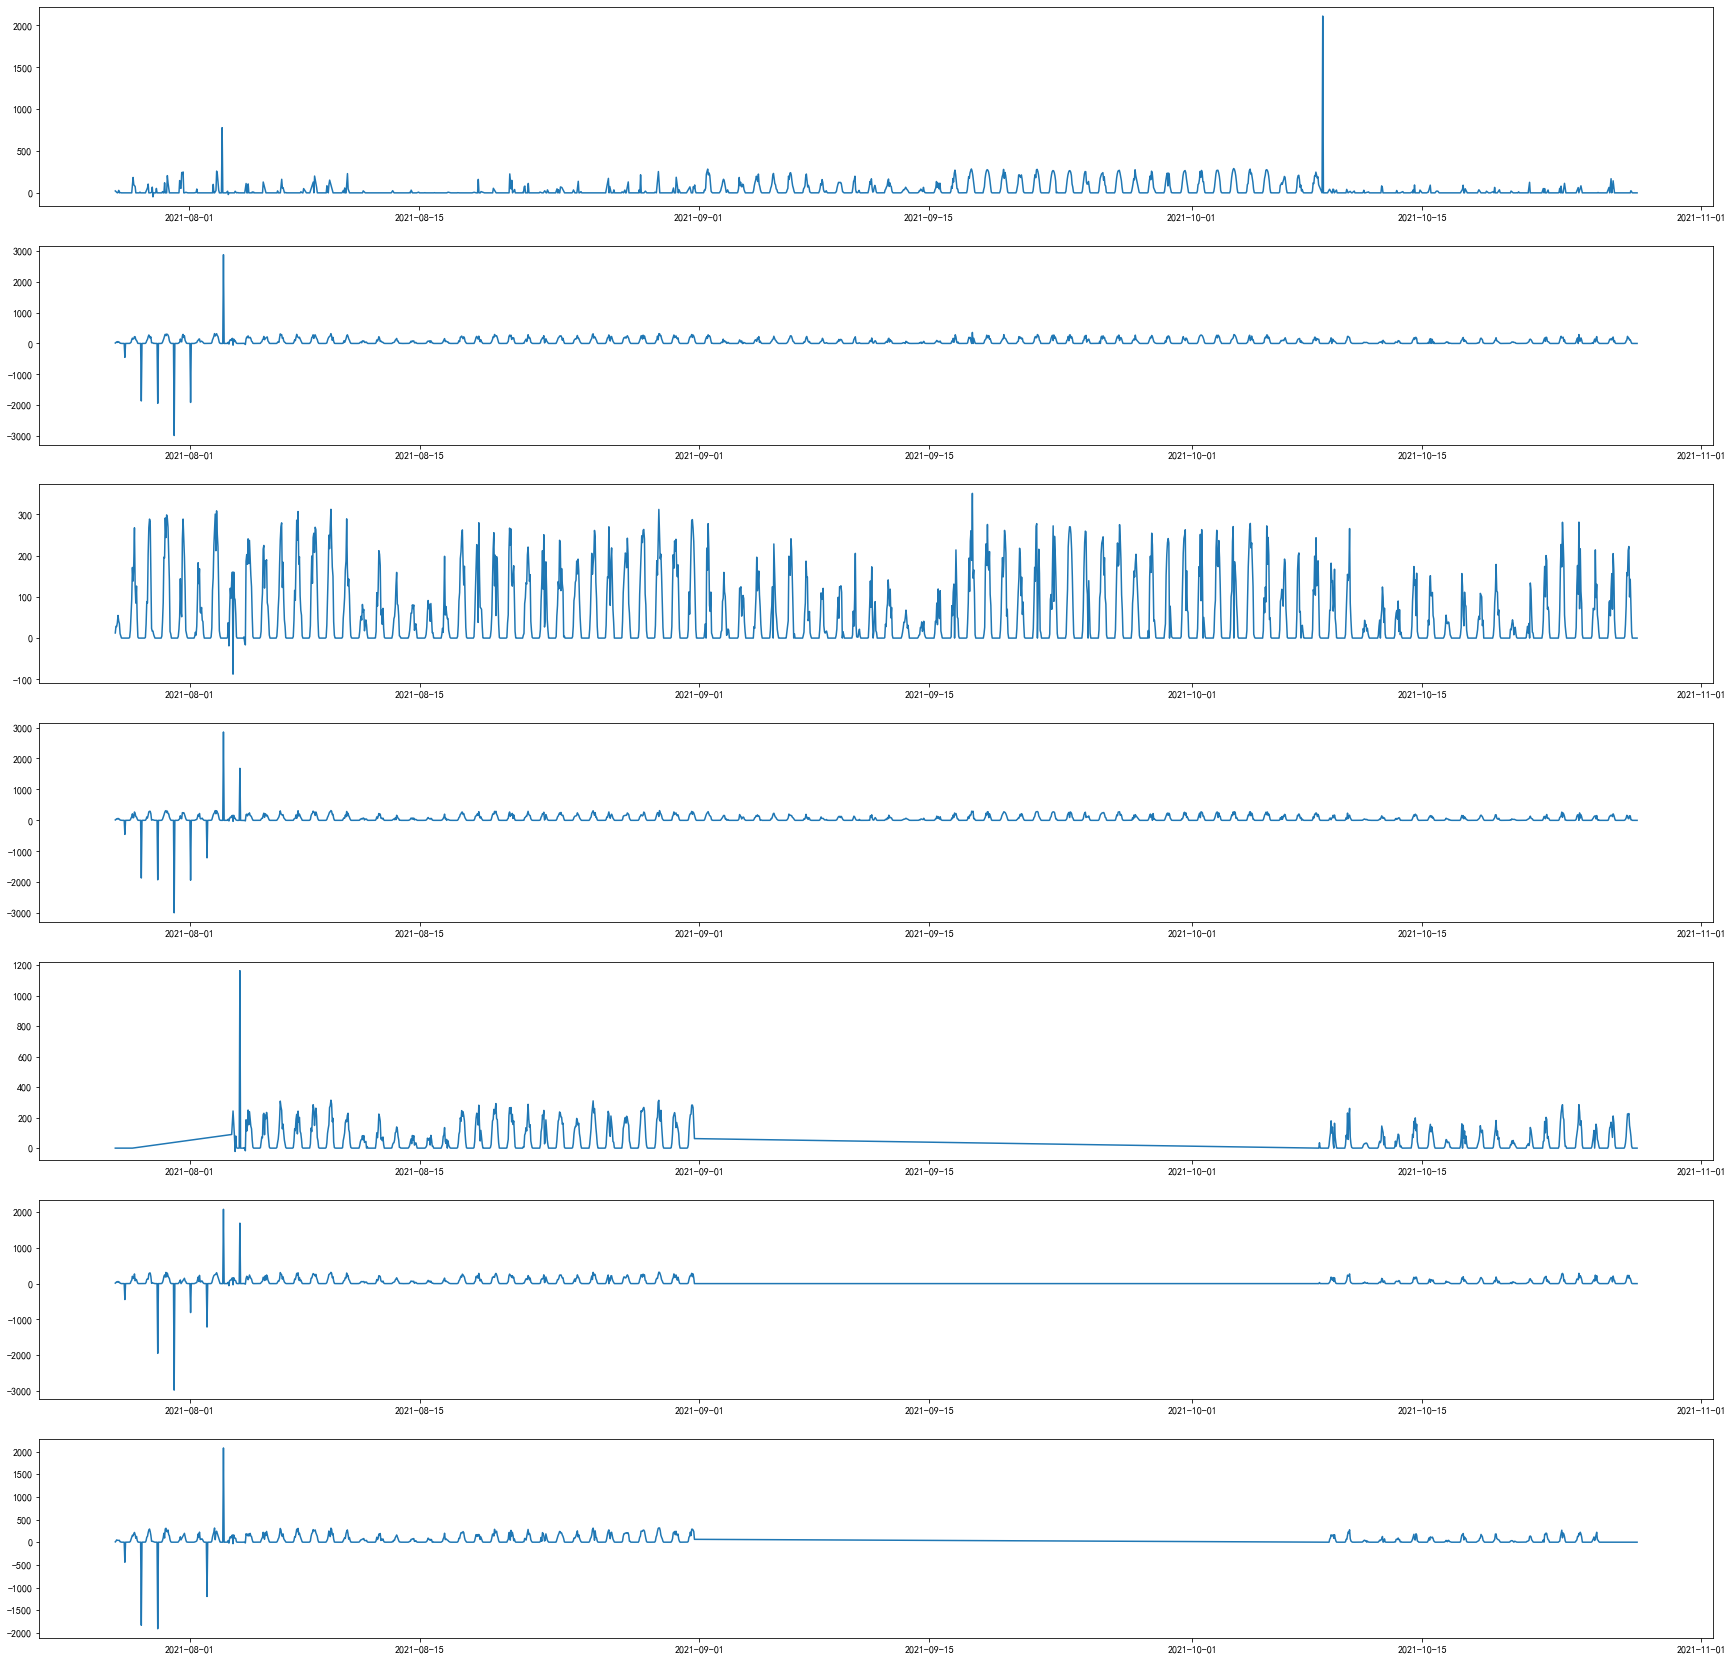

In [5]:
plt.figure(figsize=(30,30))
plt.subplot(7, 1, 1)
plt.plot(raw_data_432["time"],raw_data_432["energy_consumption"])
plt.subplot(7, 1, 2)
plt.plot(raw_data_455["time"],raw_data_455["energy_consumption"])
plt.subplot(7, 1, 3)
plt.plot(raw_data_456["time"],raw_data_456["energy_consumption"])
plt.subplot(7, 1, 4)
plt.plot(raw_data_457["time"],raw_data_457["energy_consumption"])
plt.subplot(7, 1, 5)
plt.plot(raw_data_449["time"],raw_data_449["energy_consumption"])
plt.subplot(7, 1, 6)
plt.plot(raw_data_450["time"],raw_data_450["energy_consumption"])
plt.subplot(7, 1, 7)
plt.plot(raw_data_454["time"],raw_data_454["energy_consumption"])

###### 后面3个还是不要了，中间一段都没有数据啊，保留432, 455, 456, 457，接下来分别对4个逆变器的数据进行清洗

In [6]:
#数据清洗，去除小于0和过大的异常值
raw_data_432=raw_data_432[raw_data_432["energy_consumption"]<=400.00]
raw_data_432=raw_data_432[raw_data_432["energy_consumption"]>=0]

raw_data_455=raw_data_455[raw_data_455["energy_consumption"]<=1000.00]
raw_data_455=raw_data_455[raw_data_455["energy_consumption"]>=0]

raw_data_456=raw_data_456[raw_data_456["energy_consumption"]<=1000.00]
raw_data_456=raw_data_456[raw_data_456["energy_consumption"]>=0]

raw_data_457=raw_data_457[raw_data_457["energy_consumption"]<=1000.00]
raw_data_457=raw_data_457[raw_data_457["energy_consumption"]>=0]

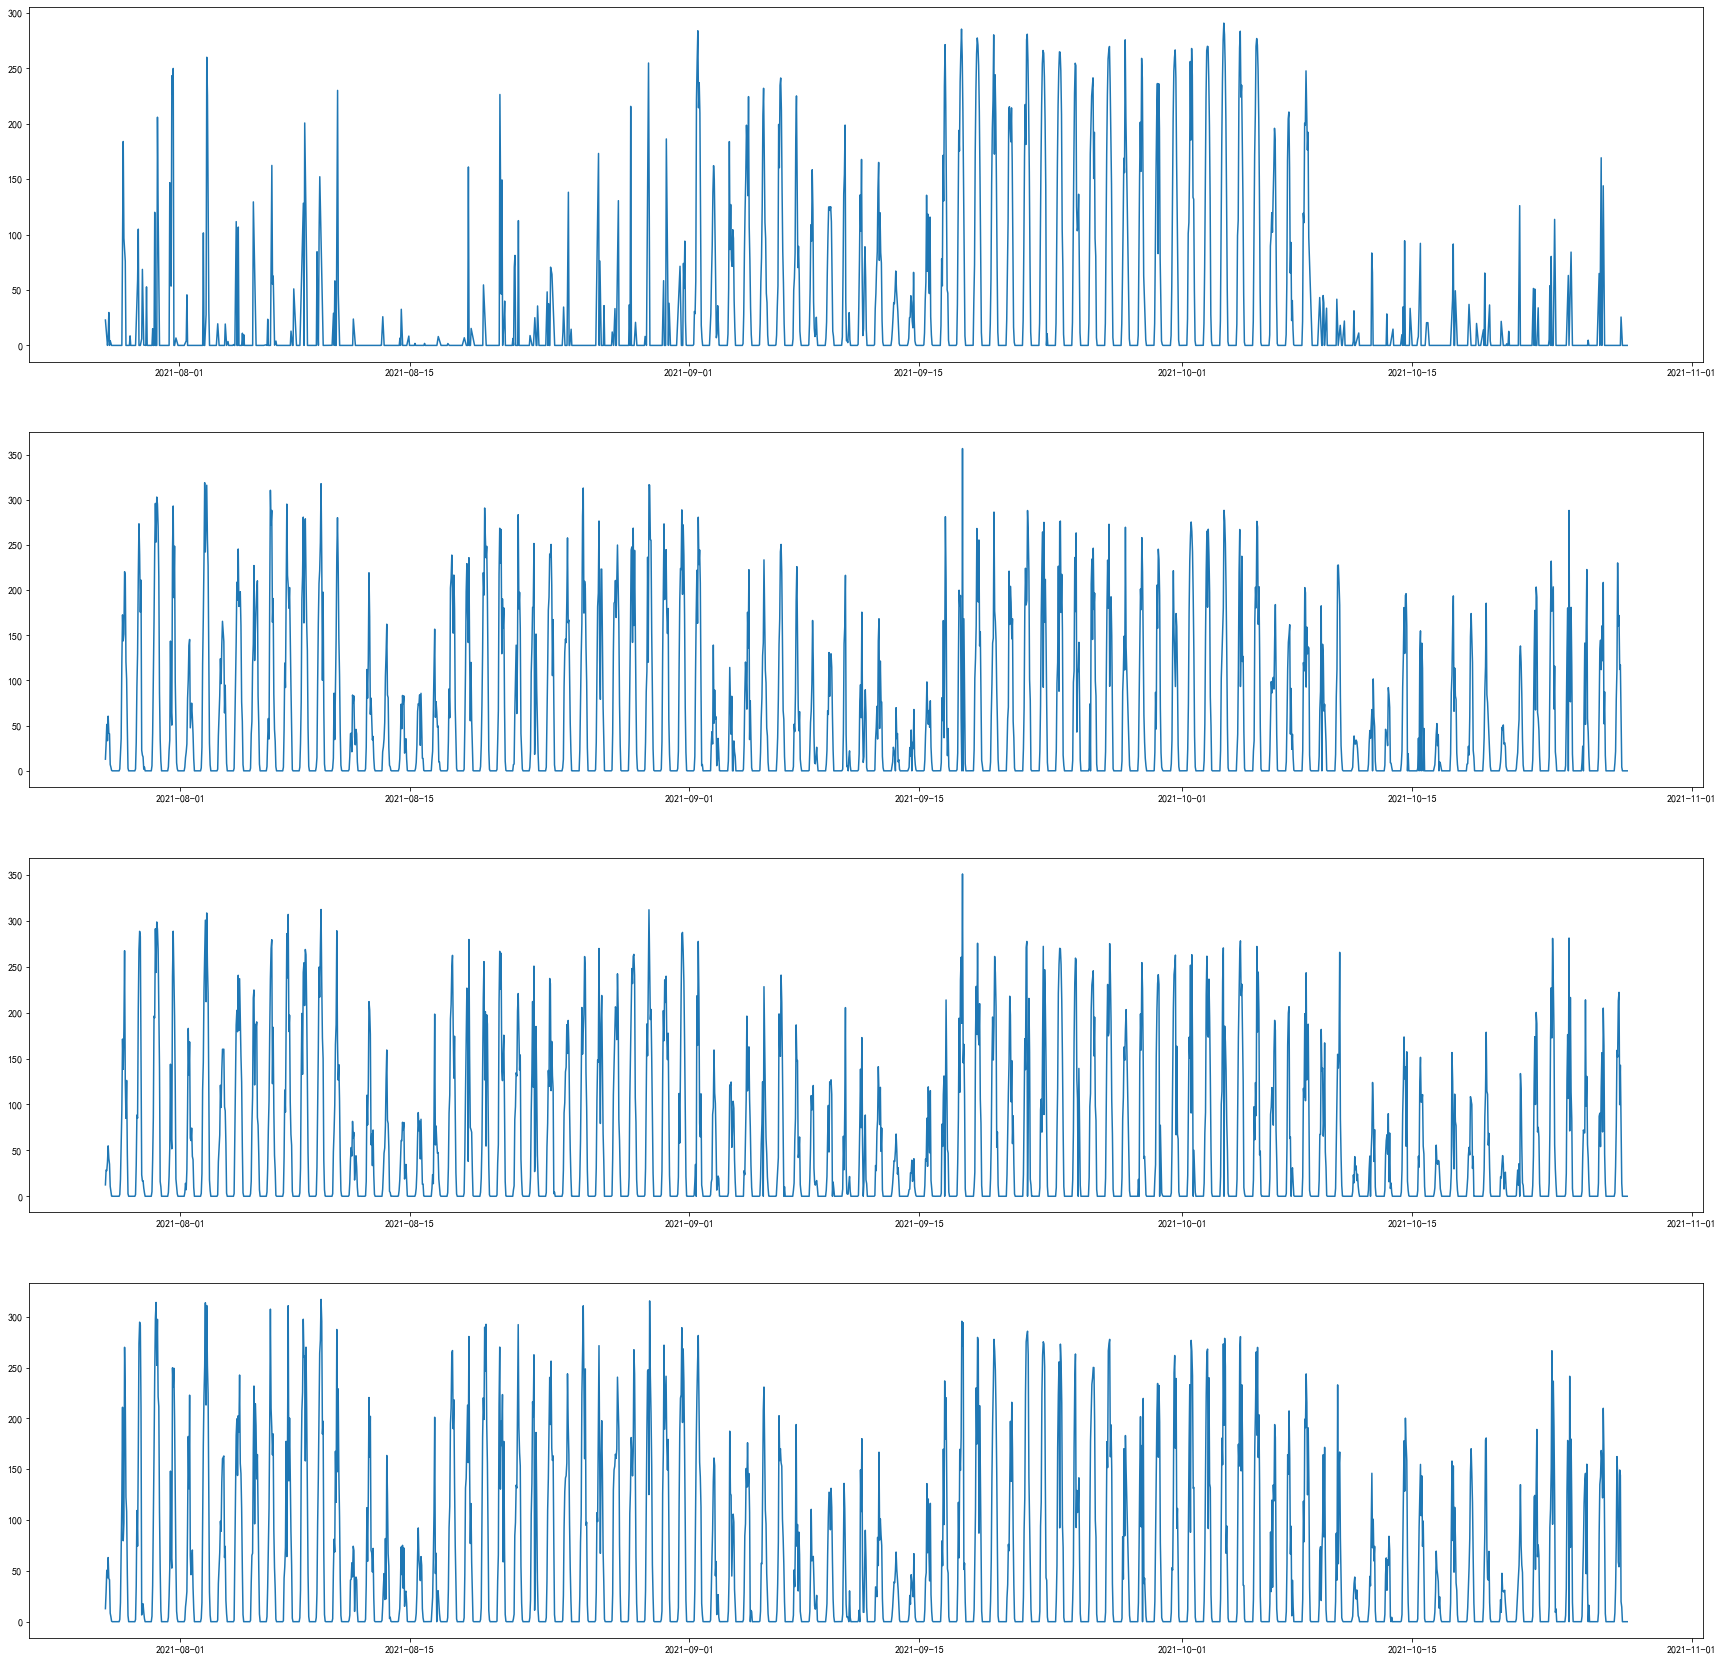

In [7]:
#看一下初步清洗的数据
plt.figure(figsize=(30,30))
plt.subplot(4, 1, 1)
plt.plot(raw_data_432["time"],raw_data_432["energy_consumption"])
plt.subplot(4, 1, 2)
plt.plot(raw_data_455["time"],raw_data_455["energy_consumption"])
plt.subplot(4, 1, 3)
plt.plot(raw_data_456["time"],raw_data_456["energy_consumption"])
plt.subplot(4, 1, 4)
plt.plot(raw_data_457["time"],raw_data_457["energy_consumption"])

In [8]:
#看一下清洗过后的数据集的shape
print(
raw_data_432.shape,
raw_data_455.shape,
raw_data_456.shape,
raw_data_457.shape
)

(1700, 3) (2208, 3) (2214, 3) (2206, 3)


In [9]:
raw_data_432=raw_data_432.iloc[:,[1]]
raw_data_455=raw_data_455.iloc[:,[1]]
raw_data_456=raw_data_456.iloc[:,[1]]
raw_data_457=raw_data_457.iloc[:,[1]]

## LSTM

### 首先分别对4个逆变器的发电量试一下lstm

Epoch 1/5
569/569 - 2s - loss: 0.0359
Epoch 2/5
569/569 - 1s - loss: 0.0228
Epoch 3/5
569/569 - 1s - loss: 0.0218
Epoch 4/5
569/569 - 1s - loss: 0.0218
Epoch 5/5
569/569 - 1s - loss: 0.0218
Train Score: 11.25 RMSE
Test Score: 11.79 RMSE


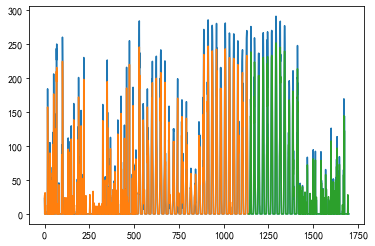

In [11]:
import math
import numpy 
import numpy as np
import pydot
import graphviz
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.utils.vis_utils import plot_model
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
  
# 创建数据集
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

# 加载数据
dataset = raw_data_432.values  
    
# 数据处理，归一化至0~1之间
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
    
# 划分训练集和测试集
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
    
# 创建测试集和训练集
look_back = 1
trainX, trainY = create_dataset(train, look_back)           #单步预测
testX, testY = create_dataset(test, look_back)
    
# 调整输入数据的格式
trainX = numpy.reshape(trainX, (trainX.shape[0], look_back, trainX.shape[1]))#（样本个数，1，输入的维度）
testX = numpy.reshape(testX, (testX.shape[0], look_back, testX.shape[1]))
    
######################################## 创建LSTM神经网络模型##############################################
model = Sequential()
model.add(LSTM(5, input_shape=(trainX.shape[1], trainX.shape[2])))#输入维度为1，时间窗的长度为1，隐含层神经元节点个数为120
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=5, batch_size=2, verbose=2)
    
# 预测
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
    
# 反归一化
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
    
# 计算得分
a=np.min(testPredict[:,0])
b=np.min(trainPredict[:,0])
testPredict[:,0][testPredict[:,0]<=a] = 0
trainPredict[:,0][trainPredict[:,0]<=b] = 0

trainRMSE = math.sqrt(mean_squared_error(trainY[0][:len(trainPredict)-1], trainPredict[1:,0]))
print('Train Score: %.2f RMSE' % (trainRMSE))
testRMSE = math.sqrt(mean_squared_error(testY[0][:len(testPredict)-1], testPredict[1:,0]))
print('Test Score: %.2f RMSE' % (testRMSE))
    
# 绘图
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot[1:])
plt.plot(testPredictPlot[1:])
plt.show()

Epoch 1/5
739/739 - 3s - loss: 0.0346
Epoch 2/5
739/739 - 1s - loss: 0.0176
Epoch 3/5
739/739 - 1s - loss: 0.0159
Epoch 4/5
739/739 - 1s - loss: 0.0158
Epoch 5/5
739/739 - 1s - loss: 0.0157
Train Score: 11.87 RMSE
Test Score: 8.54 RMSE


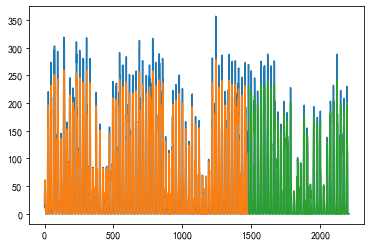

In [12]:
import math
import numpy as np
import pydot
import graphviz
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.utils.vis_utils import plot_model
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
  
# 创建数据集
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)

# 加载数据
dataset = raw_data_455.values  
    
# 数据处理，归一化至0~1之间
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
    
# 划分训练集和测试集
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
    
# 创建测试集和训练集
look_back = 1
trainX, trainY = create_dataset(train, look_back)           #单步预测
testX, testY = create_dataset(test, look_back)
    
# 调整输入数据的格式
trainX = numpy.reshape(trainX, (trainX.shape[0], look_back, trainX.shape[1]))#（样本个数，1，输入的维度）
testX = numpy.reshape(testX, (testX.shape[0], look_back, testX.shape[1]))
    
######################################## 创建LSTM神经网络模型##############################################
model = Sequential()
model.add(LSTM(2, input_shape=(trainX.shape[1], trainX.shape[2])))#输入维度为1，时间窗的长度为1，隐含层神经元节点个数为120
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=5, batch_size=2, verbose=2)
    
# 预测
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
    
# 反归一化
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
    
# 计算得分
a=np.min(testPredict[:,0])
b=np.min(trainPredict[:,0])
testPredict[:,0][testPredict[:,0]<=a] = 0
trainPredict[:,0][trainPredict[:,0]<=b] = 0

trainRMSE = math.sqrt(mean_squared_error(trainY[0][:len(trainPredict)-1], trainPredict[1:,0]))
print('Train Score: %.2f RMSE' % (trainRMSE))
testRMSE = math.sqrt(mean_squared_error(testY[0][:len(testPredict)-1], testPredict[1:,0]))
print('Test Score: %.2f RMSE' % (testRMSE))
    
# 绘图
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot[1:])
plt.plot(testPredictPlot[1:])
plt.show()

Epoch 1/5
741/741 - 3s - loss: 0.0372
Epoch 2/5
741/741 - 1s - loss: 0.0188
Epoch 3/5
741/741 - 1s - loss: 0.0156
Epoch 4/5
741/741 - 1s - loss: 0.0155
Epoch 5/5
741/741 - 1s - loss: 0.0154
Train Score: 11.57 RMSE
Test Score: 9.35 RMSE


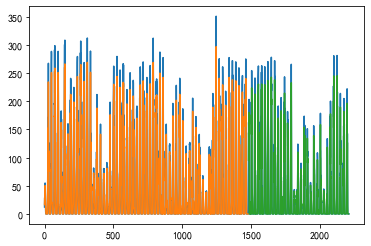

In [13]:
import math
import numpy as np
import pydot
import graphviz
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.utils.vis_utils import plot_model
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
  
# 创建数据集
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)

# 加载数据
dataset = raw_data_456.values  
    
# 数据处理，归一化至0~1之间
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
    
# 划分训练集和测试集
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
    
# 创建测试集和训练集
look_back = 1
trainX, trainY = create_dataset(train, look_back)           #单步预测
testX, testY = create_dataset(test, look_back)
    
# 调整输入数据的格式
trainX = numpy.reshape(trainX, (trainX.shape[0], look_back, trainX.shape[1]))#（样本个数，1，输入的维度）
testX = numpy.reshape(testX, (testX.shape[0], look_back, testX.shape[1]))
    
######################################## 创建LSTM神经网络模型##############################################
model = Sequential()
model.add(LSTM(2, input_shape=(trainX.shape[1], trainX.shape[2])))#输入维度为1，时间窗的长度为1，隐含层神经元节点个数为120
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=5, batch_size=2, verbose=2)
    
# 预测
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
    
# 反归一化
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
    
# 计算得分
a=np.min(testPredict[:,0])
b=np.min(trainPredict[:,0])
testPredict[:,0][testPredict[:,0]<=a] = 0
trainPredict[:,0][trainPredict[:,0]<=b] = 0

trainRMSE = math.sqrt(mean_squared_error(trainY[0][:len(trainPredict)-1], trainPredict[1:,0]))
print('Train Score: %.2f RMSE' % (trainRMSE))
testRMSE = math.sqrt(mean_squared_error(testY[0][:len(testPredict)-1], testPredict[1:,0]))
print('Test Score: %.2f RMSE' % (testRMSE))
    
# 绘图
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot[1:])
plt.plot(testPredictPlot[1:])
plt.show()

Epoch 1/5
492/492 - 2s - loss: 0.0618
Epoch 2/5
492/492 - 1s - loss: 0.0280
Epoch 3/5
492/492 - 1s - loss: 0.0193
Epoch 4/5
492/492 - 1s - loss: 0.0187
Epoch 5/5
492/492 - 1s - loss: 0.0185
Train Score: 15.36 RMSE
Test Score: 11.75 RMSE


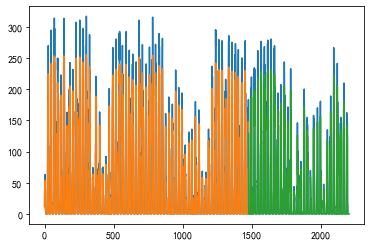

In [14]:
import math
import numpy as np
import pydot
import graphviz
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.utils.vis_utils import plot_model
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
  
# 创建数据集
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)

# 加载数据
dataset = raw_data_457.values  
    
# 数据处理，归一化至0~1之间
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
    
# 划分训练集和测试集
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
    
# 创建测试集和训练集
look_back = 1
trainX, trainY = create_dataset(train, look_back)           #单步预测
testX, testY = create_dataset(test, look_back)
    
# 调整输入数据的格式
trainX = numpy.reshape(trainX, (trainX.shape[0], look_back, trainX.shape[1]))#（样本个数，1，输入的维度）
testX = numpy.reshape(testX, (testX.shape[0], look_back, testX.shape[1]))
    
######################################## 创建LSTM神经网络模型##############################################
model = Sequential()
model.add(LSTM(5, input_shape=(trainX.shape[1], trainX.shape[2])))#输入维度为1，时间窗的长度为1，隐含层神经元节点个数为120
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=5, batch_size=3, verbose=2)
    
# 预测
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
    
# 反归一化
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
    
# 计算得分
a=np.min(testPredict[:,0])
b=np.min(trainPredict[:,0])
testPredict[:,0][testPredict[:,0]<=a] = 0
trainPredict[:,0][trainPredict[:,0]<=b] = 0

trainRMSE = math.sqrt(mean_squared_error(trainY[0][:len(trainPredict)-1], trainPredict[1:,0]))
print('Train Score: %.2f RMSE' % (trainRMSE))
testRMSE = math.sqrt(mean_squared_error(testY[0][:len(testPredict)-1], testPredict[1:,0]))
print('Test Score: %.2f RMSE' % (testRMSE))
    
# 绘图
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot[1:])
plt.plot(testPredictPlot[1:])
plt.show()

**结论：4个逆变器分开的结果都还可以，RMSE在7-10左右**


### 现在试一下4个逆变器合起来

In [14]:
from pycaret.regression import *

In [15]:
raw_data=raw_data[raw_data["device_id"].isin([432,455,456,457])]#只选出4个逆变器的数据
raw_data=raw_data[raw_data["energy_consumption"]<=800.00]#洗数据
raw_data=raw_data[raw_data["energy_consumption"]>=0]#洗数据
raw=raw_data.groupby(['time']).sum().reset_index()#汇总
raw=raw[raw["device_id"]==1800]#保留4个逆变器都记录到的观测
raw

,time,device_id,energy_consumption
1,2021-07-27 11:59:00,1800,110.3
4,2021-07-27 14:59:00,1800,178.5
5,2021-07-27 15:59:00,1800,131.4
6,2021-07-27 16:59:00,1800,146.9
7,2021-07-27 17:59:00,1800,26.2
...,...,...,...
2212,2021-10-27 19:59:00,1800,0.0
2213,2021-10-27 20:59:00,1800,0.0
2214,2021-10-27 21:59:00,1800,0.0
2215,2021-10-27 22:59:00,1800,0.0


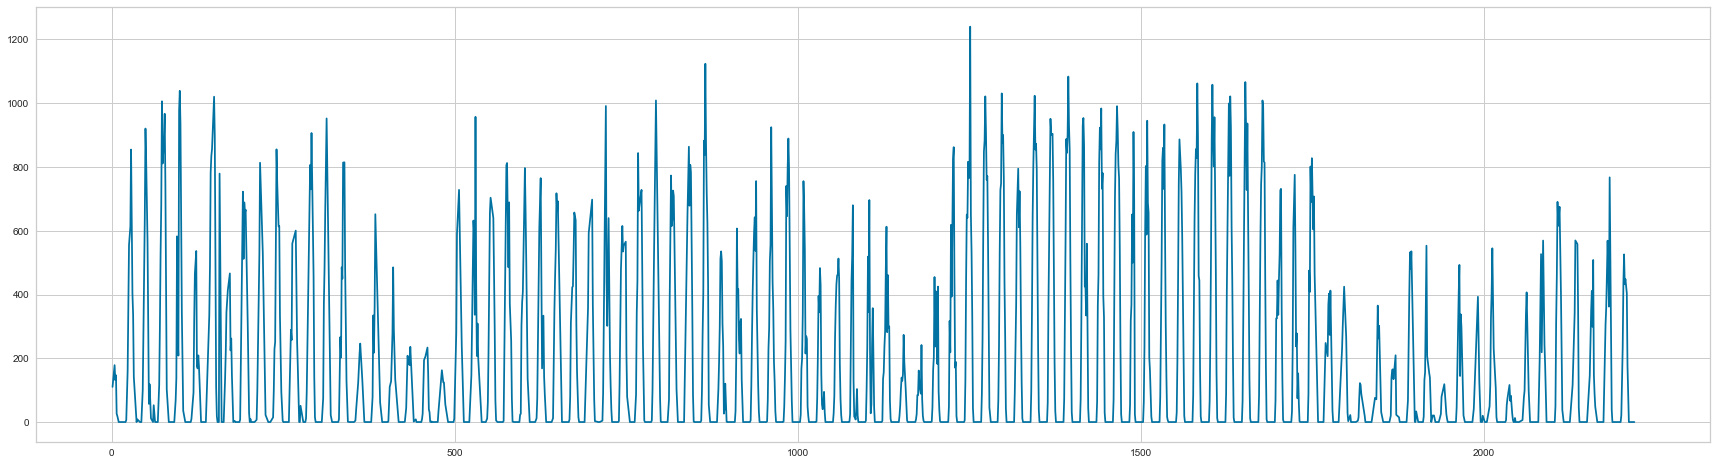

In [16]:
plt.figure(figsize=(30,8))
plt.plot(raw["energy_consumption"])

In [17]:
raw=raw.iloc[:,[0,2]]
raw['TIME_HOUR'] = raw['time'].dt.hour
raw['TIME_MONTH'] = raw['time'].dt.month
raw=raw.iloc[:,[1,2,3]]
raw

,energy_consumption,TIME_HOUR,TIME_MONTH
1,110.3,11,7
4,178.5,14,7
5,131.4,15,7
6,146.9,16,7
7,26.2,17,7
...,...,...,...
2212,0.0,19,10
2213,0.0,20,10
2214,0.0,21,10
2215,0.0,22,10


#### 先试一下pycaret

In [18]:
dataset = raw.values  
train_size = int(len(dataset) * 0.67)

In [19]:
data_train = raw_data.iloc[:train_size,:].reset_index(drop=True)
data_unseen = raw_data.iloc[train_size:,:]

In [20]:
reg_test = setup(data = raw, target = 'energy_consumption', session_id=123)

,Description,Value
0,session_id,123
1,Target,energy_consumption
2,Original Data,"(1683, 3)"
3,Missing Values,False
4,Numeric Features,1
5,Categorical Features,1
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(1178, 5)"


In [21]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
ada,AdaBoost Regressor,81.9363,22553.0046,149.7348,0.7049,1.1885,3.3995,0.0100
gbr,Gradient Boosting Regressor,81.3167,23307.2948,152.0741,0.6953,0.8951,2.4852,0.0190
lightgbm,Light Gradient Boosting Machine,81.0506,23509.0234,152.6817,0.6933,0.7331,2.2325,0.0840
rf,Random Forest Regressor,81.6586,24269.3780,155.1196,0.6841,0.6710,2.2446,0.0990
dt,Decision Tree Regressor,82.0713,24738.0888,156.5081,0.6783,0.6778,2.2591,0.0070
catboost,CatBoost Regressor,82.2502,24743.2628,156.5749,0.6781,0.7011,2.2973,0.2280
et,Extra Trees Regressor,82.0909,24752.1728,156.5603,0.6781,0.6758,2.2578,0.0970
xgboost,Extreme Gradient Boosting,82.2079,24802.6100,156.7442,0.6773,0.6740,2.2604,0.1170
knn,K Neighbors Regressor,86.0832,27936.5768,165.8967,0.6364,0.6903,2.4189,0.0230
omp,Orthogonal Matching Pursuit,223.5703,77413.2418,277.3855,-0.0021,3.7317,49.8287,0.0090


AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
                  n_estimators=50, random_state=123)

#### 试一下多变量LSTM

In [22]:
import math
import numpy 
import numpy as np
import pydot
import graphviz
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from numpy import concatenate  # 数组拼接

from keras.utils.vis_utils import plot_model
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
  
# 创建数据集
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), ]
        dataX.append(a)
        dataY.append(dataset[i + look_back, ])
    return numpy.array(dataX), numpy.array(dataY)

# 加载数据
dataset = raw.values  
    
# 数据处理，归一化至0~1之间
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
    
# 划分训练集和测试集
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
    
# 创建测试集和训练集
look_back = 1
trainx, trainy = create_dataset(train, look_back)           #单步预测
testx, testy = create_dataset(test, look_back)
    
# 调整输入数据的格式
trainX = numpy.reshape(trainx, (trainx.shape[0], look_back, trainx.shape[1]))#（样本个数，1，输入的维度）
testX = numpy.reshape(testx, (testx.shape[0], look_back, testx.shape[1]))
    
######################################## 创建LSTM神经网络模型##############################################
model = Sequential()
model.add(LSTM(4, input_shape=(trainX.shape[1], trainX.shape[2])))#输入维度为1，时间窗的长度为1，隐含层神经元节点个数为120
model.add(Dense(20))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=5, batch_size=2, verbose=2)
    
# 预测
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
    
# 反归一化
trainPredict = concatenate((trainPredict, trainx[:, 1:]), axis=1)   # 数组拼接
trainPredict = scaler.inverse_transform(trainPredict)
trainPredict = trainPredict[:,0]

testPredict = concatenate((testPredict, testx[:, 1:]), axis=1)   # 数组拼接
testPredict = scaler.inverse_transform(testPredict)
testPredict = testPredict[:,0]


#trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
#testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
    
# 计算得分
a=np.min(testPredict[:,0])
b=np.min(trainPredict[:,0])
testPredict[:,0][testPredict[:,0]<=a] = 0
trainPredict[:,0][trainPredict[:,0]<=b] = 0

trainRMSE = math.sqrt(mean_squared_error(trainY[0][:len(trainPredict)-1], trainPredict[1:,0]))
print('Train Score: %.2f RMSE' % (trainRMSE))
testRMSE = math.sqrt(mean_squared_error(testY[0][:len(testPredict)-1], testPredict[1:,0]))
print('Test Score: %.2f RMSE' % (testRMSE))
    
# 绘图
plt.figure(figsize=(30,8))

trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

plt.plot(scaler.inverse_transform(dataset)[:])
plt.plot(trainPredictPlot[1:])
plt.plot(testPredictPlot[1:])
plt.show()

ValueError: cannot reshape array of size 3375 into shape (1125,1,1)

In [32]:
import pandas as pd
from util import PROCESS_LEVEL1
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from series_to_supervised_learning import series_to_supervised
pd.options.display.expand_frame_repr = False

dataset = raw

cols = list(dataset)
cols.insert(0,cols.pop(cols.index('energy_consumption'))) 
dataset = dataset.loc[:,cols] 

dataset_columns = dataset.columns
values = dataset.values

# 对数据进行归一化处理
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)

# 将序列数据转化为监督学习数据
reframed = series_to_supervised(scaled, dataset_columns, 1, 1)

# 只考虑当前时刻(t)的前一时刻（t-1）的发电量
reframed.drop(reframed.columns[[-1,-2]], axis=1, inplace=True)

values = reframed.values

n_train_hours = int(len(values)*0.67)
train = values[:n_train_hours, :]
test = values[n_train_hours:, :]

# 监督学习结果划分
train_x, train_y = train[:, :-1], train[:, -1]
test_x, test_y = test[:, :-1], test[:, -1]

# 为了在LSTM中应用该数据，需要将其格式转化为3D format，即[Samples, timesteps, features]
train_X = train_x.reshape((train_x.shape[0], 1, train_x.shape[1]))
test_X = test_x.reshape((test_x.shape[0], 1, test_x.shape[1]))

from keras import Sequential
from keras.layers import LSTM, Dense
#from data_tranform import scaler, test_x, train_X, test_X, train_y, test_y
import matplotlib.pyplot as plt
from numpy import concatenate  # 数组拼接
from math import sqrt
from sklearn.metrics import mean_squared_error

model = Sequential()
model.add(LSTM(4, input_shape=(train_X.shape[1], train_X.shape[2])))#输入维度为1，时间窗的长度为1，隐含层神经元节点个数为120
model.add(Dense(20))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

history = model.fit(train_X, train_y, epochs=5, batch_size=2,verbose=2)


# make the prediction,为了在原始数据的维度上计算损失，需要将数据转化为原来的范围再计算损失
yHat = model.predict(test_X)

'''


    这里注意的是保持拼接后的数组  列数  需要与之前的保持一致
'''
yHat[:,0][yHat[:,0]<=0] = 0


inv_yHat = concatenate((yHat, test_x[:, 1:]), axis=1)   # 数组拼接
inv_yHat = scaler.inverse_transform(inv_yHat)
inv_yHat = inv_yHat[:,0]

inv_y=dataset.iloc[1126:len(values),0].values

rmse = sqrt(mean_squared_error(inv_yHat, inv_y))
print('Test RMSE: %.3f' % rmse)

Epoch 1/5
563/563 - 2s - loss: 0.0284
Epoch 2/5
563/563 - 1s - loss: 0.0162
Epoch 3/5
563/563 - 1s - loss: 0.0160
Epoch 4/5
563/563 - 1s - loss: 0.0156
Epoch 5/5
563/563 - 1s - loss: 0.0152
Test RMSE: 36.395


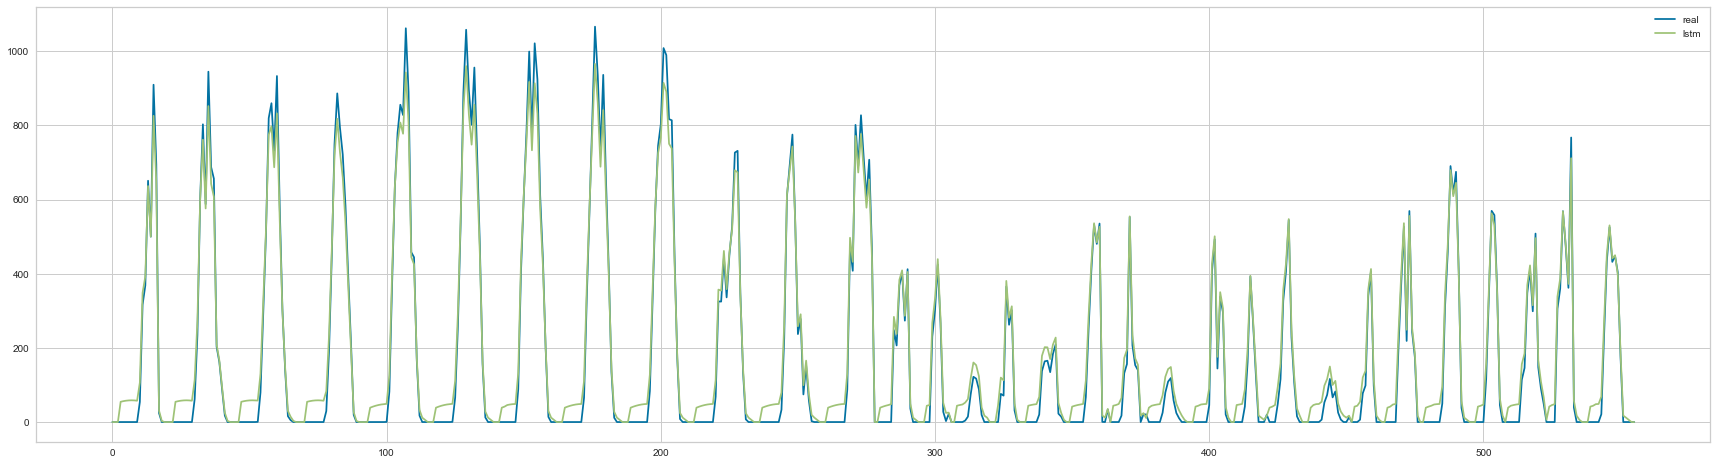

In [33]:
plt.figure(figsize=(30,8))
plt.plot(inv_y[:])
plt.plot(inv_yHat[:],"-")
plt.legend(['real','lstm'])

## 设计指标评价预测效果

### **指标1定义：bias<?占总体的比例**

About 0.140 points under 0.00 bias
About 0.200 points under 0.02 bias
About 0.254 points under 0.04 bias
About 0.322 points under 0.06 bias
About 0.381 points under 0.08 bias
About 0.423 points under 0.10 bias
About 0.446 points under 0.12 bias
About 0.459 points under 0.14 bias
About 0.468 points under 0.16 bias
About 0.475 points under 0.18 bias
About 0.478 points under 0.20 bias
About 0.486 points under 0.22 bias
About 0.489 points under 0.24 bias
About 0.493 points under 0.26 bias
About 0.496 points under 0.28 bias
About 0.504 points under 0.30 bias
About 0.511 points under 0.32 bias
About 0.513 points under 0.34 bias
About 0.516 points under 0.36 bias
About 0.525 points under 0.38 bias
About 0.531 points under 0.40 bias
About 0.532 points under 0.42 bias
About 0.532 points under 0.44 bias
About 0.536 points under 0.46 bias
About 0.540 points under 0.48 bias
About 0.543 points under 0.50 bias
About 0.547 points under 0.52 bias
About 0.552 points under 0.54 bias
About 0.554 points u

Text(0, 0.5, 'T')

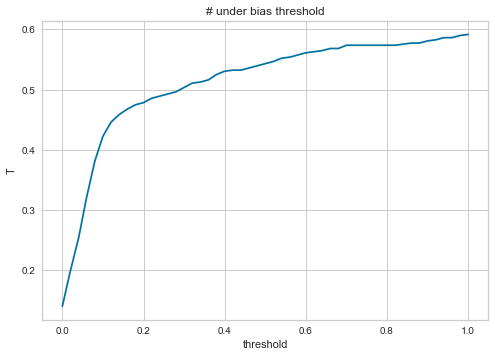

In [34]:
bias=abs(inv_y-inv_yHat)/(inv_y+0.0000000000000000000000000000000000001)
i=np.linspace(0,1,51)
bias_i=[]
for p in i:
    bias_i.append(((np.sum(bias<=p))/len(bias)))
    print("About %.3f points under %.2f bias"%(((np.sum(bias<=p))/len(bias)),p))
plt.plot(i,bias_i)
plt.title('# under bias threshold')
plt.xlabel('threshold')
plt.ylabel('T')

**可以发现：80%的输出结果与实际值的误差在10%以内**

### **指标2定义：RMSE均方根误差**

![RMSE](./0.jpg)

In [ ]:
a=np.min(testPredict[:,0])
b=np.min(trainPredict[:,0])
testPredict[:,0][testPredict[:,0]<=a] = 0
trainPredict[:,0][trainPredict[:,0]<=b] = 0

trainRMSE = math.sqrt(mean_squared_error(trainY[0][:len(trainPredict)-1], trainPredict[1:,0]))
print('Train Score: %.2f RMSE' % (trainRMSE))
testRMSE = math.sqrt(mean_squared_error(testY[0][:len(testPredict)-1], testPredict[1:,0]))
print('Test Score: %.2f RMSE' % (testRMSE))

In [1]:
raw

NameError: name 'raw' is not defined